In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


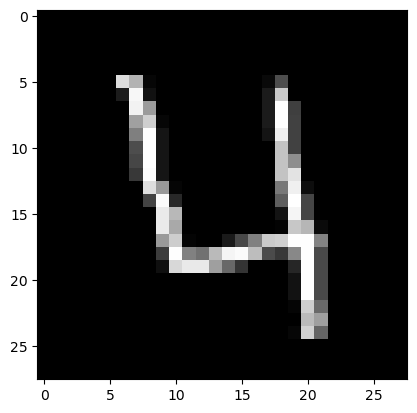

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Get the pixel values of the first image
pixels = df.iloc[3, 1:].values.reshape(28, 28)

# Display the image using matplotlib
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target
X=X/255.0

X=X.values.reshape(-1,28,28,1)

y = keras.utils.to_categorical(y, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

num_classes = 10
input_shape = (28, 28, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
1050/1050 [==============================] - 51s 48ms/step - loss: 0.2002 - accuracy: 0.9381 - val_loss: 0.0605 - val_accuracy: 0.9808
Epoch 2/30
1050/1050 [==============================] - 51s 48ms/step - loss: 0.0745 - accuracy: 0.9774 - val_loss: 0.0460 - val_accuracy: 0.9858
Epoch 3/30
1050/1050 [==============================] - 53s 50ms/step - loss: 0.0603 - accuracy: 0.9827 - val_loss: 0.0296 - val_accuracy: 0.9899
Epoch 4/30
1050/1050 [==============================] - 50s 47ms/step - loss: 0.0510 - accuracy: 0.9854 - val_loss: 0.0426 - val_accuracy: 0.9889
Epoch 5/30
1050/1050 [==============================] - 50s 48ms/step - loss: 0.0453 - accuracy: 0.9871 - val_loss: 0.0310 - val_accuracy: 0.9895
Epoch 6/30
1050/1050 [==============================] - 49s 47ms/step - loss: 0.0414 - accuracy: 0.9883 - val_loss: 0.0300 - val_accuracy: 0.9908
Epoch 7/30
1050/1050 [==============================] - 49s 46ms/step - loss: 0.0397 - accuracy: 0.9890 - val_loss: 0.0322 -

In [ ]:
test_df=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first image as a numpy array
first_image = test_df.iloc[0].to_numpy()

# Reshape the array to a 2D matrix
reshaped_image = np.reshape(first_image, (28, 28))

# Plot the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.show()

In [ ]:
test_df = test_df / 255.0
test_images = test_df.values.reshape(-1, 28, 28, 1)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
predicted_labels[0]

In [ ]:
# Save the predictions to a CSV file
results_df = pd.DataFrame({'ImageId': range(1, len(predicted_labels)+1),
                           'Label': predicted_labels})
results_df.to_csv('predictions.csv', index=False)